#Importing all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense , BatchNormalization, Activation, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam ,RMSprop
from keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model

## Importing the MNIST CSV files



In [ ]:
#connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the train and test data set separately

mnist_train = pd.read_csv('/content/drive/MyDrive/Data_science_datasets/mnist_train.csv')

mnist_test = pd.read_csv('/content/drive/MyDrive/Data_science_datasets/mnist_test.csv')

In [ ]:
#Copying and separating the values of train dataset into X and y

y_train = mnist_train["label"].copy().to_numpy()
X_train = mnist_train.drop(columns=["label"]).to_numpy()

print("The training digits data:\n", X_train)
print("Digit labels: ", y_train)

# Similarly for the test set
y_test = mnist_test["label"].copy().to_numpy()
X_test = mnist_test.drop(columns=["label"]).to_numpy()

print("*"*60)
print("The training digits data:\n", X_test)
print("Digit labels: ", y_test)

The training digits data:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Digit labels:  [5 0 4 ... 5 6 8]
************************************************************
The training digits data:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Digit labels:  [7 2 1 ... 4 5 6]


In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


In [ ]:
# counting the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# counting the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


#Compute the number of labels 

The data must be in the correct shape and format after loading the MNIST dataset, the number of labels is computed as:

In [ ]:
# compute the number of labels
num_labels_X = len(np.unique(X_train))
num_labels_y = len(np.unique(y_train))

In [ ]:
print("X_train = ",num_labels_X)
print("y_train = ",num_labels_y)

X_train =  256
y_train =  10


#One Hot Encoding



*   At this point, the labels are in digits format, 0 to 9.
*  This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.
* A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.
*   For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.



The following lines convert each label into a one-hot vector:

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Data Preprocessing

* In deep learning, data is stored in tensors.

* The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

Setting network parameters 

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

#Designing the model architecture 

##Sequential class in Keras

* The next step is to design the model architecture. The proposed model is made of three MLP layers.

* In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer.

* Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout.
* The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.

* In Keras, we can add the required types of layers through the add() method.



In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels_y))
model.add(Activation('softmax'))

##Viewing the model summary

Keras library provides us summary() method to check the model description.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

Another way of verifying the network is by calling the plot_model() method as follows:

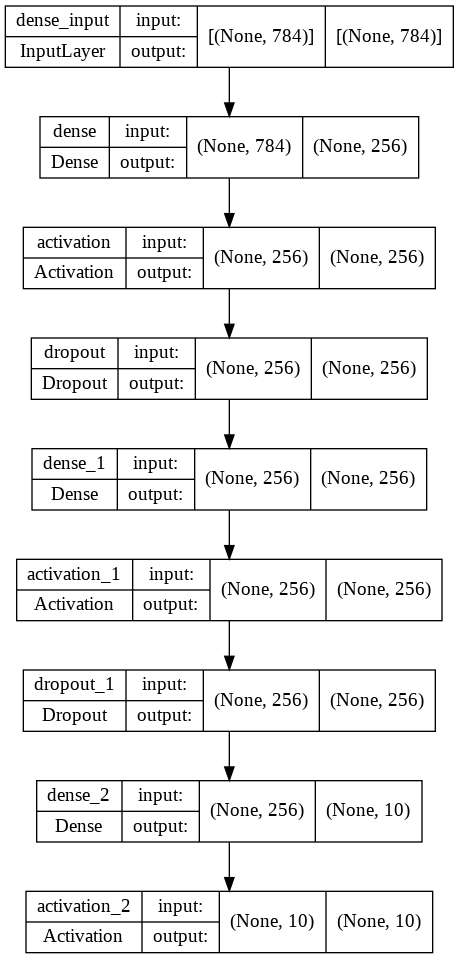

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

#Implement MLP model using Keras 

The implementation of MLP model in Keras comprises of three steps:-

1. Compiling the model with the compile() method.

2. Training the model with fit() method.

3. Evaluating the model performance with evaluate() method.

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#Creating a checkpoint to monitor accuracy.

filepath="mnist.data.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=5)
callbacks_list = [checkpoint, es]

In [ ]:
#train the model with fit() method
model.fit(X_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 8s 12ms/step - loss: 5.7014 - accuracy: 0.5863
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 1.1736 - accuracy: 0.6830
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.9809 - accuracy: 0.7407
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.8494 - accuracy: 0.7839
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.7380 - accuracy: 0.8138
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6357 - accuracy: 0.8449
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5576 - accuracy: 0.8630
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4797 - accuracy: 0.8810
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4387 - accuracy: 0.8900
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3955 - accuracy: 0.901

In [ ]:
#Evaluate model with evaluate() method 

test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1799 - accuracy: 0.9562


In [ ]:
#Accuracy of the model

print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.9562


#Inspecting the output



In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = (model.predict(X_test) > 0.5).astype("int32")

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  from ipykernel import kernelapp as app


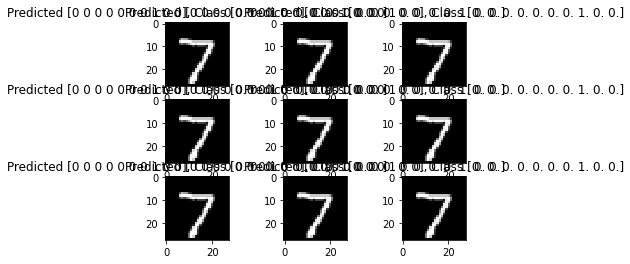

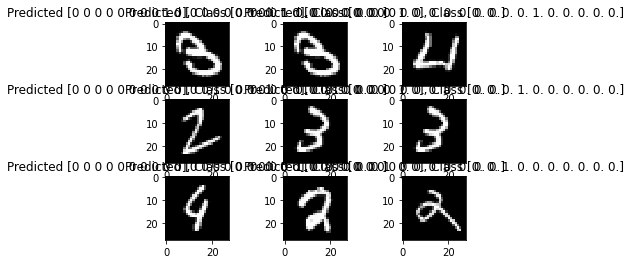

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()